In [135]:
#load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
#load dataset for analysis
df_diesel_price = pd.read_csv('diesel_price AR.csv', header=0, index_col=0)
df_diesel_price.head()
import statsmodels.api as sm

#######################################
    Line Plot for the Diesel Price     
#######################################


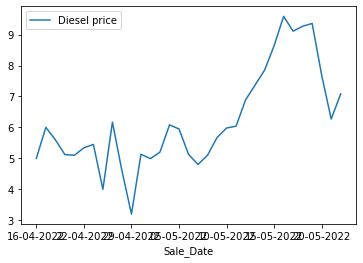

In [2]:
print("#######################################")
print("    Line Plot for the Diesel Price     ")
print("#######################################")
df_diesel_price.plot()
pyplot.show()

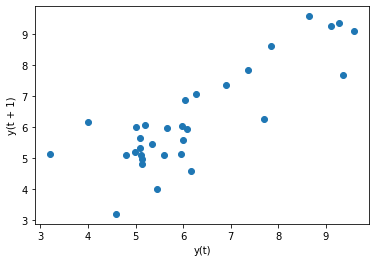

In [32]:
from pandas.plotting import lag_plot
print("#######################################")
print("    Lag plot for the Diesel Price     ")
print("#######################################")
lag_plot(df_diesel_price)
pyplot.show()

<h2>Autocorrelation using 3 lags</h2>

In [49]:
values = pd.DataFrame(df_diesel_price.values)
dataframe = pd.concat([values.shift(3),values.shift(2),values.shift(1), values], axis=1)
print("###############################################")
print("    Autocorrelation using 3 lags (corr())      ")
print("###############################################")
dataframe.columns = ['t-1', 't+1', 't+2','t+3']
result = dataframe.corr()
print(result)
print("###############################################")

###############################################
    Autocorrelation using 3 lags (corr())      
###############################################
          t-1       t+1       t+2       t+3
t-1  1.000000  0.850301  0.735969  0.698860
t+1  0.850301  1.000000  0.838991  0.737966
t+2  0.735969  0.838991  1.000000  0.836193
t+3  0.698860  0.737966  0.836193  1.000000
###############################################


<h2>Autocorrelation (AR) Plots</h2>

	###############################################
           Autocorrelation (AR) Plots          
	###############################################


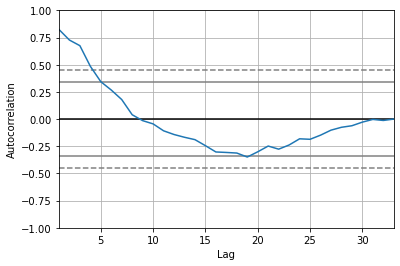

In [51]:
from pandas.plotting import autocorrelation_plot
print("\t###############################################")
print("           Autocorrelation (AR) Plots          ")
print("\t###############################################")
autocorrelation_plot(df_diesel_price)
pyplot.show()

	###############################################
	Autocorrelation (AR) Plot using ACF function   
	###############################################


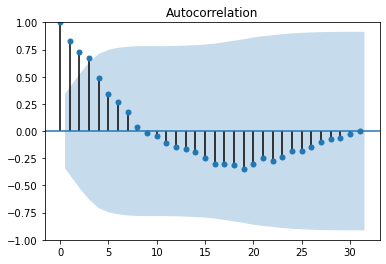

In [53]:
from pandas import read_csv
from matplotlib import pyplot
print("\t###############################################")
print("\tAutocorrelation (AR) Plot using ACF function   ")
print("\t###############################################")
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diesel_price, lags=31)
pyplot.show()

In [40]:
#Including liberaries for Auto-regression (AR)
print("\t\tAuto-regression (AR)")
print("\t\t#####################\n")
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = pd.read_csv('diesel_price AR.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset for test and train
X = series.values
train, test = X[1:len(X)-5], X[len(X)-5:]
# Implementing Auto-regression using AutoReg algorithm
model = AutoReg(train, lags=10)
model_fit = model.fit()
print("\t###############################################")
print("\t    Coefficient for the taken sample for AR    ")
print("\t###############################################")
print('\t %s' % model_fit.params)
# make predictions
start=len(train)
end=len(train)+len(test)-1
predictions = model_fit.predict(start,end, dynamic=False)
#looping the prediction
print("\t###############################################")
print("\t               Predicted Vs Expected           ")
print("\t###############################################")
for i in range(len(predictions)):
 print('\tpredicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print("\t###############################################")
print("\tTest RMSE: %.3f" % rmse)
print("\t###############################################")
print("\t###############################################")
print('\tTest MSE: %.3f' % test_score)
print("\t###############################################")

		Auto-regression (AR)
		#####################

	###############################################
	    Coefficient for the taken sample for AR    
	###############################################
	 [-4.42837797  0.88085754 -0.18652467  0.3274679  -0.32614067  0.3361129
  0.25017828  0.22951608  0.04673161  0.11385048  0.27097321]
	###############################################
	               Predicted Vs Expected           
	###############################################
	predicted=9.970689, expected=9.270000
	predicted=11.540870, expected=9.360000
	predicted=12.922754, expected=7.690000
	predicted=15.048094, expected=6.270000
	predicted=17.460997, expected=7.080000
	###############################################
	Test RMSE: 6.595
	###############################################
	###############################################
	Test MSE: 0.947
	###############################################


<ipython-input-40-b1b894fafbb7>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('diesel_price AR.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
<ipython-input-40-b1b894fafbb7>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  series = pd.read_csv('diesel_price AR.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


	###############################################
	          Plotting Test Vs predictions         
	###############################################


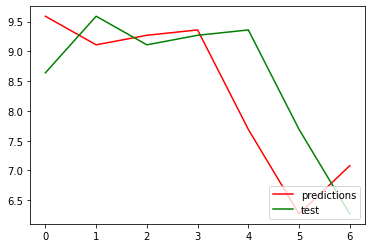

In [39]:
print("\t###############################################")
print("\t          Plotting Test Vs predictions         ")
print("\t###############################################")

def plot_test_predict(x):
 return x
predictions = list()
for x in test_X:
 y = plot_test_predict(x)
 predictions.append(y)
test_score = mean_squared_error(test_y, predictions)
# plot predictions vs expected
pyplot.plot(test_y,color="red")
pyplot.plot(predictions, color="green")
plt.legend(["predictions", "test"], loc ="lower right")
pyplot.show()

In [2]:
#load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
#load dataset for SMA model analysis
df_diesel_price_MA = pd.read_csv('diesel_price MA -Python.csv', header=0, index_col=0)
df_diesel_price_MA.head()

,Diesel_price
Sale_Date,
16-04-2022,5.00
17-04-2022,6.00
18-04-2022,5.60
18-04-2022,5.12
21-04-2022,5.10


			###############################################
			     Simple Moving Average (SMA): - Plot       
			###############################################


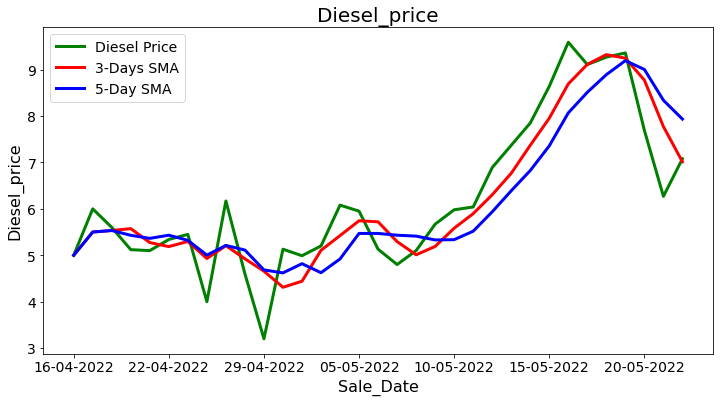

In [99]:
df_diesel_price_MA['SMA-1'] = df_diesel_price_MA.Diesel_price.rolling(3, min_periods=1).mean()
df_diesel_price_MA['SMA-2'] = df_diesel_price_MA.Diesel_price.rolling(5, min_periods=1).mean()
colors = ['green', 'red', 'blue']
df_diesel_price_MA.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Diesel Price', '3-Days SMA', '5-Day SMA'], fontsize=14)
plt.title('Diesel_price', fontsize=20)
plt.xlabel('Sale_Date', fontsize=16)
plt.ylabel('Diesel_price', fontsize=16)
print("\t\t\t###############################################")
print("\t\t\t     Simple Moving Average (SMA): - Plot       ")
print("\t\t\t###############################################")

In [56]:
#load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
#load dataset for CMA model analysis
df_diesel_price_CMA = pd.read_csv("diesel_price CMA.csv", header=0, index_col=0)

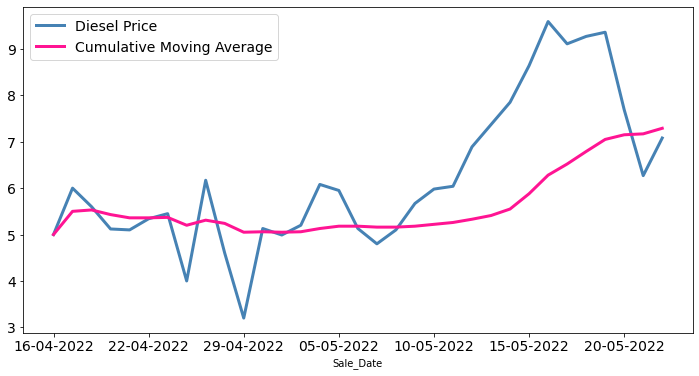

In [44]:
#Cumulative Moving Average Vs Diesel Price from the execl sheet
df_diesel_price_CMA.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =["Diesel Price", "Cumulative Moving Average"], fontsize=14)

In [46]:
df_diesel_price_CMA.index.name = 'Sale_Date'
df_diesel_price_CMA['average_price'] = df_diesel_price_CMA.mean(axis=1)
df_diesel_price_CMA['CMA'] = df_diesel_price_CMA.average_price.expanding().mean()

		############################################################
		           Cumulative Moving Average Plot for Diesel        
		############################################################


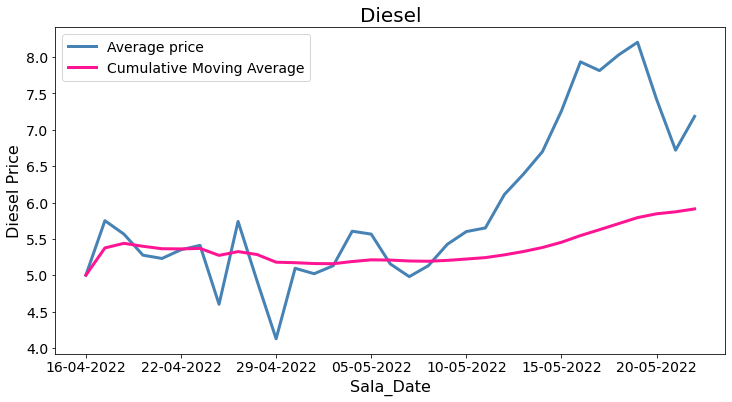

In [51]:
df_diesel_price_CMA[['average_price', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average price', 'Cumulative Moving Average'], fontsize=14)
plt.title('Diesel', fontsize=20)
plt.xlabel('Sala_Date', fontsize=16)
plt.ylabel('Diesel Price', fontsize=16)
print("\t\t############################################################")
print("\t\t           Cumulative Moving Average Plot for Diesel        ")
print("\t\t############################################################")

In [91]:
#load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
#load dataset for EMA model analysis
df_diesel_price_EMA = pd.read_csv("diesel_price EMA.csv", header=0, index_col=0)

In [92]:
df_diesel_price_EMA.index.name = 'Sale_Date'
df_diesel_price_EMA['average_price'] = df_diesel_price_EMA.mean(axis=1)
df_diesel_price_EMA['EMA'] = df_diesel_price_EMA.average_price.expanding().mean()

In [96]:
# smoothing factor - 0.1,0.25,.5
df_diesel_price_EMA['EMA_0.1'] = df_diesel_price_EMA.average_price.ewm(alpha=0.1, adjust=False).mean()
df_diesel_price_EMA['EMA_0.25'] = df_diesel_price_EMA.average_price.ewm(alpha=0.25, adjust=False).mean()
df_diesel_price_EMA['EMA_0.5'] = df_diesel_price_EMA.average_price.ewm(alpha=0.5, adjust=False).mean()

		############################################################
		           Exponential Moving Average Plot for Diesel        
		############################################################


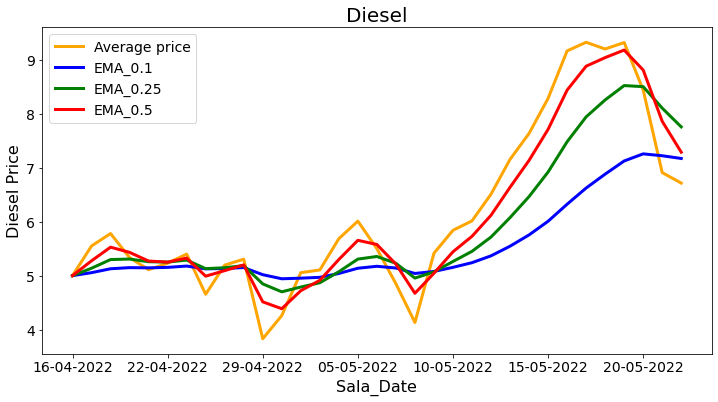

In [97]:
colors = ['orange','blue', 'green', 'red']
df_diesel_price_EMA[['average_price', 'EMA_0.1','EMA_0.25','EMA_0.5']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average price', 'EMA_0.1','EMA_0.25','EMA_0.5'], fontsize=14)
plt.title('Diesel', fontsize=20) 
plt.xlabel('Sala_Date', fontsize=16)
plt.ylabel('Diesel Price', fontsize=16)
print("\t\t############################################################")
print("\t\t           Exponential Moving Average Plot for Diesel        ")
print("\t\t############################################################")

<H2>ARIMA Model</H2>

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
df_diesel_price_ARIMA = pd.read_csv("diesel_price ARIMA.csv", header=0, index_col=0)

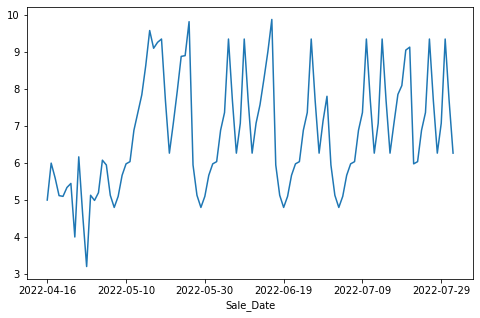

In [252]:
df_diesel_price_ARIMA["Diesel_ price"].plot(figsize=(8,5))

####################################################
        Plotting ACF and PACF - given dataset       
####################################################


C:\Users\pandi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  


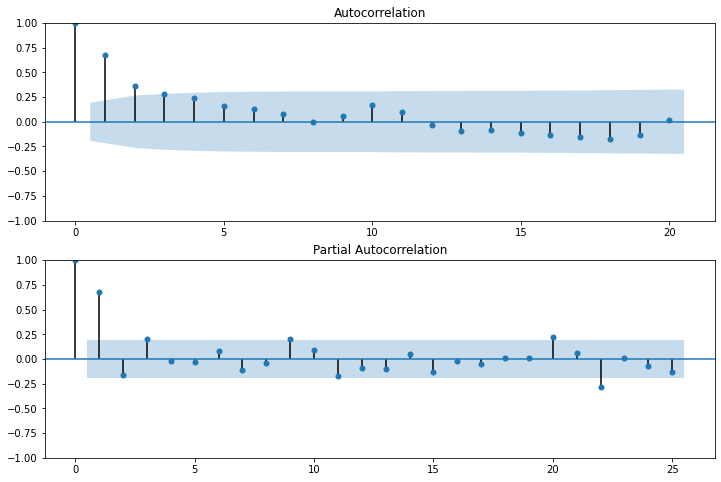

In [253]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
print("####################################################")
print("        Plotting ACF and PACF - given dataset       ")
print("####################################################")
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diesel_price_ARIMA["Diesel_ price"].dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diesel_price_ARIMA["Diesel_ price"].dropna(),lags=25,ax=ax2)

In [255]:
from statsmodels.tsa.arima.model import ARIMA
print("####################################################")
print("              ARIMA Model Building                  ")
print("####################################################")
model = ARIMA(df_diesel_price_ARIMA['Diesel_ price'], order=(1,0,0))
model_fit=model.fit()
model_fit.summary()

####################################################
              ARIMA Model Building                  
####################################################


C:\Users\pandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pandi\anaconda3\lib\site-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Diesel_ price   No. Observations:                  260
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -159.659
Date:                Thu, 08 Jun 2023   AIC                            325.319
Time:                        00:40:27   BIC                            336.001
Sample:                             0   HQIC                           329.613
                                - 260                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7619      0.372     18.154      0.000       6.032       7.492
ar.L1          0.6760      0.075      8.999      0.000       0.529       0.823
sigma2         1.2544      0.186      6.761      0.000       0.891       1.618
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):               202.66
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [251]:
model_fit.forecast(100)

C:\Users\pandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


260    6.761891
261    6.761891
262    6.761891
263    6.761891
264    6.761891
         ...   
355    6.761891
356    6.761891
357    6.761891
358    6.761891
359    6.761891
Name: predicted_mean, Length: 100, dtype: float64

			####################################################
			         Actual Vs Forecasting plot                 
			####################################################


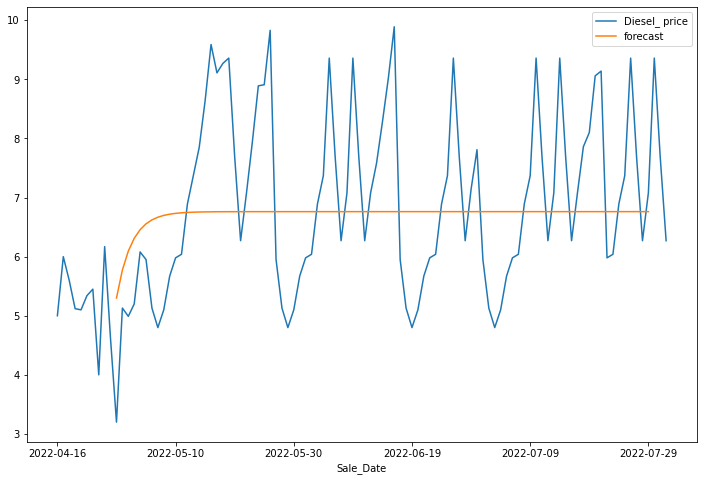

In [260]:
df_diesel_price_EMA['forecast']=model_fit.predict(start=10,end=100,dynamic=True)
df_diesel_price_EMA[['Diesel_ price','forecast']].plot(figsize=(12,8))
print("\t\t\t####################################################")
print("\t\t\t         Actual Vs Forecasting plot                 ")
print("\t\t\t####################################################")